In [1]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
from FPC_define import *

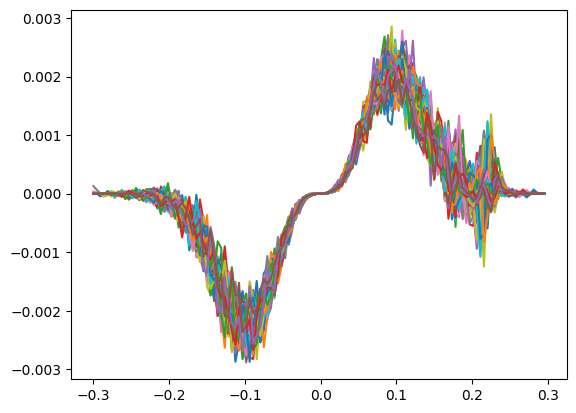

In [2]:
p1x1 = vysxd_get_data('EPW-alves/MS/PHA/p1x1/electrons/p1x1-electrons-000100.h5')

dfdv = np.gradient(p1x1.DATA,axis=0)
v_squared = np.array([p1x1.Y**2]*len(p1x1.X))
plt.plot(p1x1.Y,np.multiply(dfdv,np.transpose(v_squared)));

In [3]:
A, B = FPC('EPW-alves')

We are interested to see the energy transfer in velocity space, so we need to integrate over x

Alternatively, just pick an x position that you want to look at.

In [6]:
A_int_wrt_x = np.trapz(A, axis = 1)
B_int_wrt_x = np.trapz(B, axis = 1)

x_pos = 50
# A_int_wrt_x = A[x_pos,:,:]
# B_int_wrt_x = B[x_pos,:,:]


np.shape(A_int_wrt_x)

(128, 20)

Now, integrate over a couple timesteps such that the dissipative energy transfer overpowers the oscillatory

In [5]:
time_interval = [3,10]
A_full_int = np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)

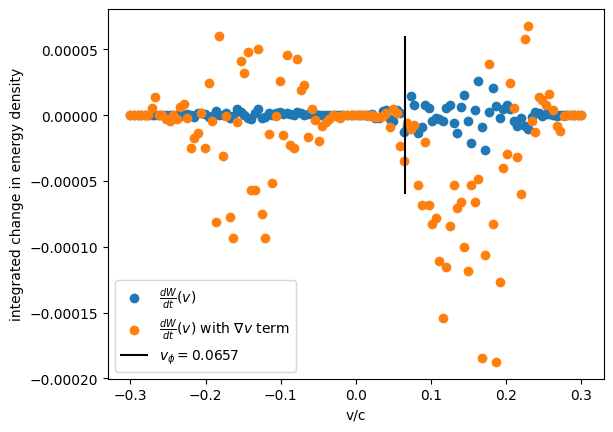

In [8]:
time_interval = [10,14]
A_full_int = np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
plt.scatter(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int, label = 'A')
plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with $\nabla v$ term')
vphase = 0.0657
plt.vlines([vphase],ymin = -6e-5,ymax = 6e-5, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
# plt.xlim(0,0.2)
plt.ylabel('integrated change in energy density')
plt.xlabel('v/c')
plt.legend()

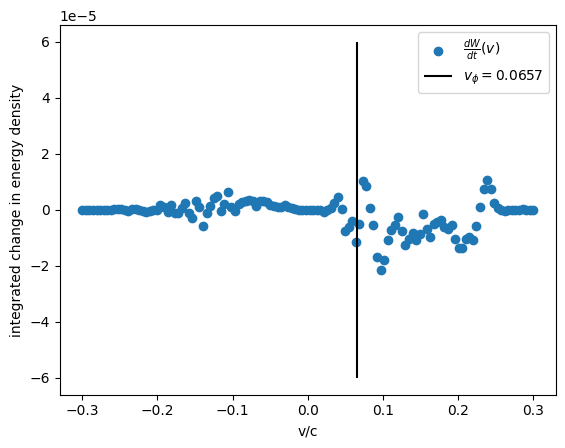

In [10]:
time_interval = [4,7]
A_full_int = np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
plt.scatter(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int, label = 'A')
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with $\nabla v$ term')
vphase = 0.0657
plt.vlines([vphase],ymin = -6e-5,ymax = 6e-5, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
# plt.xlim(0,0.1)
plt.ylabel('integrated change in energy density')
plt.xlabel('v/c')
plt.legend()